<a href="https://colab.research.google.com/github/YaseenAli7812/Projects/blob/main/Image_Classification_Fashion_MNIST_with_CNN__(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load train and test CSV files
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.shape

(60000, 785)

In [ ]:
test_df.shape

(10000, 785)

In [ ]:
!pip install idx2numpy

In [ ]:
import idx2numpy

# Load the IDX files
train_images = idx2numpy.convert_from_file("train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file("train-labels-idx1-ubyte")
test_images = idx2numpy.convert_from_file("t10k-images-idx3-ubyte")
test_labels = idx2numpy.convert_from_file("t10k-labels-idx1-ubyte")

# Print the shapes of the datasets
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
x_data = train_df.drop(['label'],axis=1)
y_data = train_df['label']

In [ ]:
x_data.shape

(60000, 784)

In [ ]:
y_data.shape

(60000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_df,X_val_df,y_train_df,y_val_df = train_test_split(x_data,y_data,test_size=0.15,random_state=34,stratify=y_data)

**Normalizing and Reshaping**

In [ ]:
X_train_df = X_train_df / 255.0
X_val_df = X_val_df / 255.0

In [ ]:
X_train = X_train_df.values.reshape(-1, 28, 28, 1)
X_val = X_val_df.values.reshape(-1, 28, 28, 1)

In [ ]:
x_test = test_df.iloc[:, 1:] / 255.0
y_test = test_df.iloc[:, 0]

X_test = x_test.values.reshape(-1, 28, 28, 1)

**Visualizing**

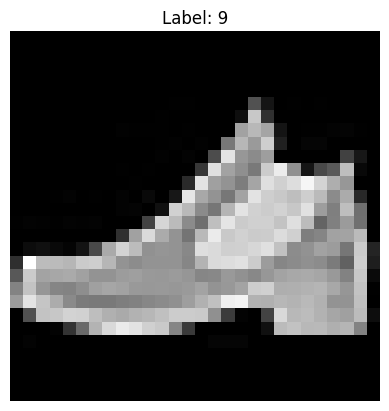

In [ ]:
import matplotlib.pyplot as plt

image = x_data.iloc[1].values
label = y_data.iloc[1]


image = image.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

**CNN Implementation**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adagrad
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input,BatchNormalization

In [ ]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             6

 Total params: 119,754 (467.79 KB)

 Trainable params: 118,922 (464.54 KB)

 Non-trainable params: 832 (3.25 KB)

In [ ]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history =  model.fit(
    X_train,y_train_df,
    validation_data = (X_val,y_val_df),
    epochs = 15,
    verbose = 1,
    batch_size=128
)

Epoch 1/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.7013 - loss: 0.8517 - val_accuracy: 0.6782 - val_loss: 1.0771
Epoch 2/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8386 - loss: 0.4446 - val_accuracy: 0.8574 - val_loss: 0.3806
Epoch 3/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8640 - loss: 0.3737 - val_accuracy: 0.8761 - val_loss: 0.3396
Epoch 4/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8774 - loss: 0.3388 - val_accuracy: 0.8919 - val_loss: 0.3016
Epoch 5/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8858 - loss: 0.3165 - val_accuracy: 0.8822 - val_loss: 0.3095
Epoch 6/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8912 - loss: 0.2944 - val_accuracy: 0.8862 - val_loss: 0.3044
Epoch 7/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8973 - loss: 0.2783 - val_accuracy: 0.8988 - val_loss: 0.2774
Epoch 8/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9017 - loss: 0.2605 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8978 - loss: 0.2945
Test Accuracy: 89.84%


In [ ]:
train_loss, train_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"train Accuracy: {train_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8978 - loss: 0.2945
train Accuracy: 89.84%


**Model Performance Visualization**

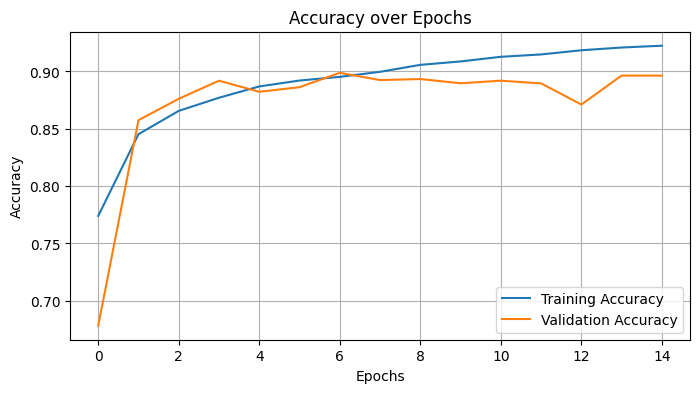

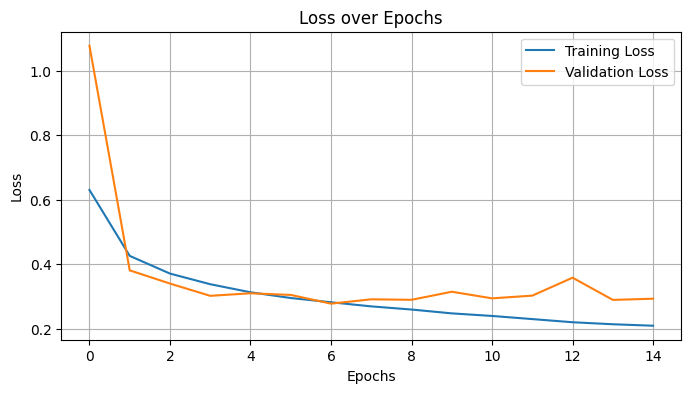

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


**0 T-shirt/top**
**1 Trouser**
**2 Pullover**
**3 Dress**
**4 Coat**
**5 Sandal**
**6 Shirt**
**7 Sneaker**
**8 Bag**
**9 Ankle**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class names for FashionMNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_image(model, img_array):
    """
    Predicts the class of a single image using the trained model.
    Args:
        model: The trained CNN model.
        image_path: Path to the input image.
    """
    # Load the image
    #from PIL import Image
    #img = Image.open("/content/Bag.png").convert('L')  # Convert to grayscale
    #img = img.resize((28, 28))  # Resize to 28x28 pixels
    img_array = np.array(img)  # Convert image to numpy array

    # Normalize the image and add batch and channel dimensions
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # Predict using the model
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    # Display the image and prediction
    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

    return class_names[predicted_label]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


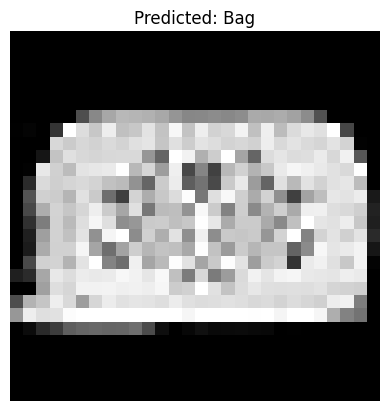

The model predicts the image is: Bag


In [ ]:
#plt.imshow(test_df.iloc[9, 1:].values.reshape(28,28,1), cmap='gray')
img = test_df.iloc[6, 1:].values.reshape(1,28,28,1)

# Example usage
predicted_class = predict_image(model, img)
print(f"The model predicts the image is: {predicted_class}")


In [ ]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   0,   0,  81,  21,   0,   1,   0,   1,   0,   0,
          0,   0],
       [  